In [1]:
"""
Notebook which contains the code for the figures used in the report.
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import seed_everything, dicom_dir_to_3d_arr, load_npz
import os
import nibabel as nib

# Set the seed for reproducibility.
seed_everything(42)

# All the paths used in the notebook.
img_dir = "../Dataset/Images"
mask_dir = "../Dataset/Segmentations"

train_set_test_results = "../test_all_train_slices"
test_set_test_results = "../test_all_test_slices"

train_metrics_csv_path = os.path.join(train_set_test_results, "metrics.csv")
test_metrics_csv_path = os.path.join(test_set_test_results, "metrics.csv")
train_pred_dir = os.path.join(train_set_test_results, "segmentations")
test_pred_dir = os.path.join(test_set_test_results, "segmentations")

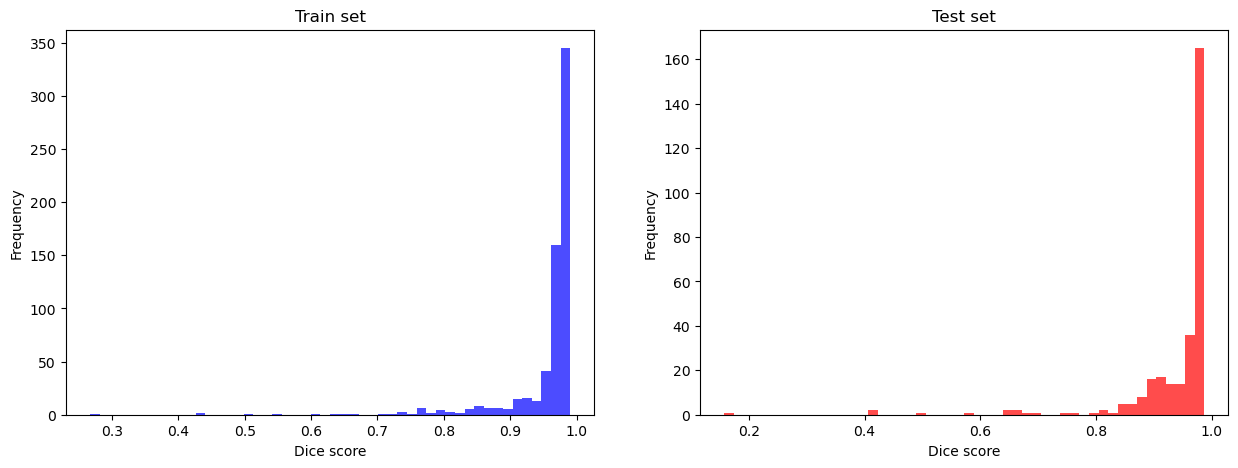

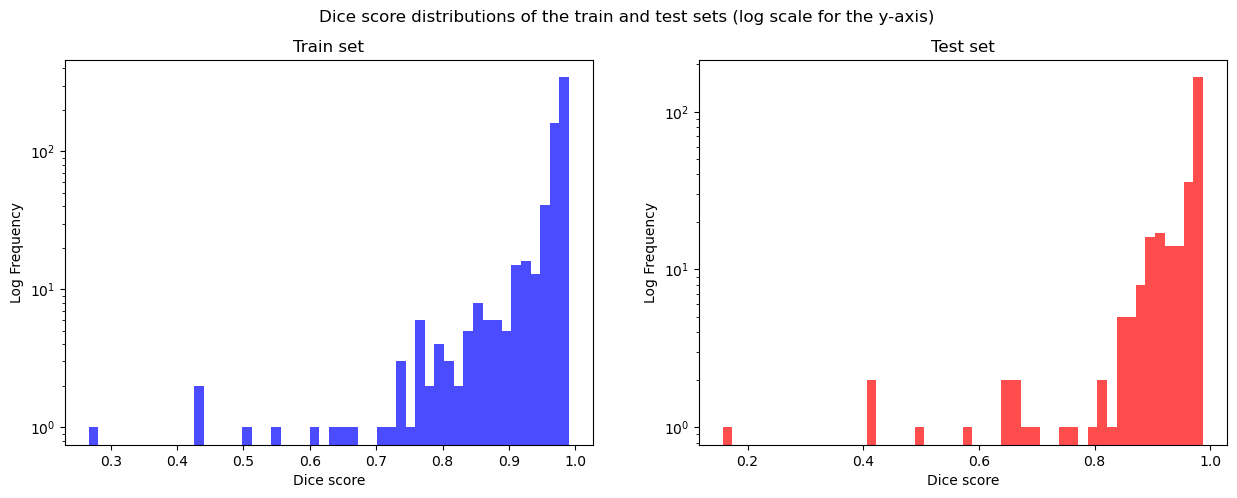

In [2]:
"""
Figure showing dice score distribution histograms of the train and test sets.
"""

train_df = pd.read_csv(train_metrics_csv_path)
test_df = pd.read_csv(test_metrics_csv_path)

# Replace 'NaN' strings with 0
train_df.replace("NaN", 0, inplace=True)
test_df.replace("NaN", 0, inplace=True)

# Drop 0 dice scores
train_df_fg_only = train_df[train_df["dice"] > 0]
test_df_fg_only = test_df[test_df["dice"] > 0]

# Plot the distributions
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(train_df_fg_only["dice"], bins=50, color="blue", alpha=0.7)
ax[0].set_title("Train set")
ax[0].set_xlabel("Dice score")
ax[0].set_ylabel("Frequency")

ax[1].hist(test_df_fg_only["dice"], bins=50, color="red", alpha=0.7)
ax[1].set_title("Test set")
ax[1].set_xlabel("Dice score")
ax[1].set_ylabel("Frequency")

# Plot the distributions with a log scale for the y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(train_df_fg_only["dice"], bins=50, color="blue", alpha=0.7)
ax[0].set_title("Train set")
ax[0].set_xlabel("Dice score")
ax[0].set_ylabel("Log Frequency")
ax[0].set_yscale("log")  # Set log scale for y-axis

ax[1].hist(test_df_fg_only["dice"], bins=50, color="red", alpha=0.7)
ax[1].set_title("Test set")
ax[1].set_xlabel("Dice score")
ax[1].set_ylabel("Log Frequency")
ax[1].set_yscale("log")  # Set log scale for y-axis

fig.suptitle(
    "Dice score distributions of the train and test sets (log scale for the y-axis)"
)
plt.show()

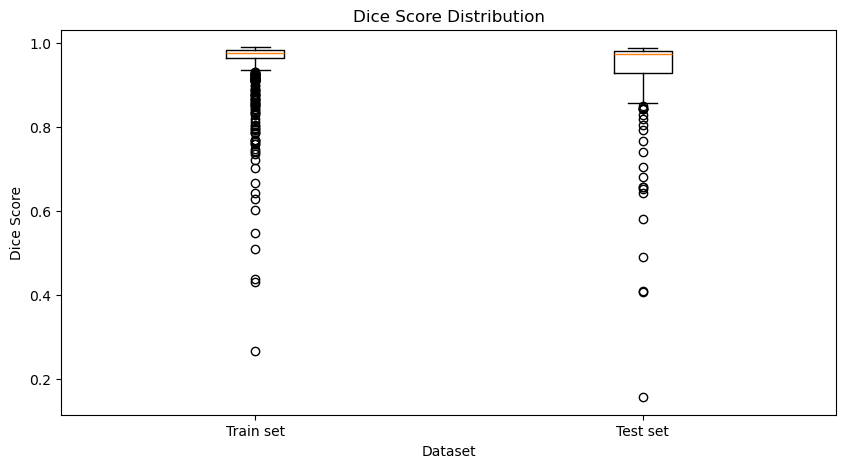

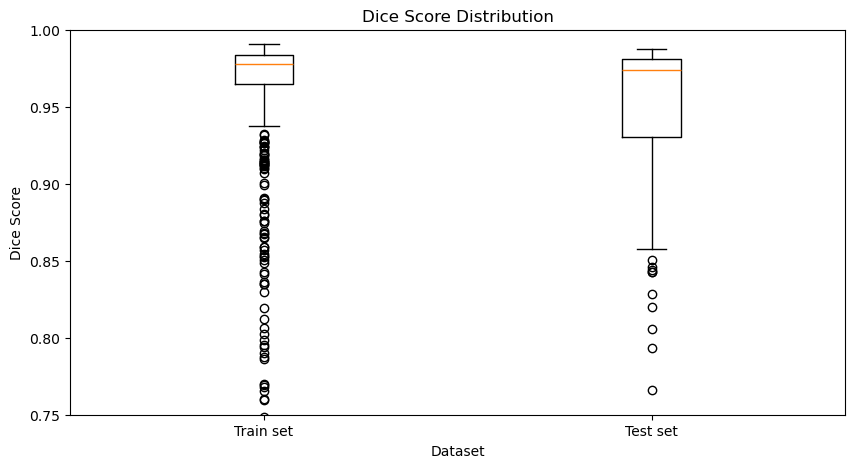

In [3]:
"""
Figure showing dice score distribution boxplots of the train and test sets.
"""

fig, ax = plt.subplots(figsize=(10, 5))

# Combine the dice scores of train and test sets
dice_scores = [train_df_fg_only["dice"], test_df_fg_only["dice"]]

# Create the boxplot
ax.boxplot(dice_scores, labels=["Train set", "Test set"])

# Set the title and labels
ax.set_title("Dice Score Distribution")
ax.set_xlabel("Dataset")
ax.set_ylabel("Dice Score")

# Show the plot
plt.show()

# Zoom in on the boxplot
fig, ax = plt.subplots(figsize=(10, 5))

# Create the boxplot
ax.boxplot(dice_scores, labels=["Train set", "Test set"])

# Set the title and labels
ax.set_title("Dice Score Distribution")
ax.set_xlabel("Dataset")
ax.set_ylabel("Dice Score")

# Set the y-axis limits
ax.set_ylim(0.75, 1)

plt.show()

In [4]:
"""
Summarise the results of the train and test sets dice scores
using a table.
"""

# Summarize the results of the train and test sets dice scores using a table

# Create a dictionary to store the summary statistics
summary_stats = {
    "Train Set": {
        "Mean Dice Score": train_df_fg_only["dice"].mean(),
        "Max Dice Score": train_df_fg_only["dice"].max(),
        "Min Dice Score": train_df_fg_only["dice"].min(),
        "Upper Quartile": train_df_fg_only["dice"].quantile(0.75),
        "Lower Quartile": train_df_fg_only["dice"].quantile(0.25),
        "IQR": train_df_fg_only["dice"].quantile(0.75)
        - train_df_fg_only["dice"].quantile(0.25),
        "Standard Deviation": train_df_fg_only["dice"].std(),
    },
    "Test Set": {
        "Mean Dice Score": test_df_fg_only["dice"].mean(),
        "Max Dice Score": test_df_fg_only["dice"].max(),
        "Min Dice Score": test_df_fg_only["dice"].min(),
        "Upper Quartile": test_df_fg_only["dice"].quantile(0.75),
        "Lower Quartile": test_df_fg_only["dice"].quantile(0.25),
        "IQR": test_df_fg_only["dice"].quantile(0.75)
        - test_df_fg_only["dice"].quantile(0.25),
        "Standard Deviation": test_df_fg_only["dice"].std(),
    },
}

# Create a DataFrame from the summary statistics dictionary
summary_df = pd.DataFrame(summary_stats)

# Display the summary table
summary_df

,Train Set,Test Set
Mean Dice Score,0.955567,0.939274
Max Dice Score,0.990600,0.987600
Min Dice Score,0.266600,0.156800
Upper Quartile,0.983800,0.980700
Lower Quartile,0.964775,0.930100
IQR,0.019025,0.050600
Standard Deviation,0.069908,0.092527


In [5]:
"""
Fetch N of the worst, best and average performing slices from the train set.
"""
N = 3

train_df_fg_only = train_df_fg_only.sort_values(by="dice")

# Get the slices with the worst dice scores.
worst_train_dice_scores = train_df_fg_only[:N]

# Get the slices with the best dice scores.
best_train_dice_scores = train_df_fg_only[-N:]


# Randomly pick 3 slices from the in_between_dice.
train_dice = train_df_fg_only["dice"]
dice_uq = np.percentile(train_dice, 75)
dice_lq = np.percentile(train_dice, 25)

lower_dice_mask = train_dice > dice_lq
upper_dice_mask = train_dice < dice_uq

in_between_train_dice_mask = lower_dice_mask * upper_dice_mask
in_between_train_dice_scores = train_df_fg_only[in_between_train_dice_mask]

in_between_train_dice_scores = in_between_train_dice_scores.sample(frac=1)[:N]

print("Best performing slices")
print(best_train_dice_scores)

print("\nWorst performing slices")
print(worst_train_dice_scores)

print("\nAverage performing slices")
print(in_between_train_dice_scores)

Best performing slices
            slice    dice  accuracy
411   case_001_90  0.9903  0.997824
1095  case_001_88  0.9906  0.997809
376   case_001_89  0.9906  0.997812

Worst performing slices
           slice    dice  accuracy
931  case_001_22  0.2666  0.997800
562  case_005_22  0.4302  0.997877
569  case_006_30  0.4381  0.997845

Average performing slices
           slice    dice  accuracy
378  case_006_83  0.9781  0.997813
266  case_002_35  0.9756  0.997761
193  case_002_94  0.9792  0.997572


In [6]:
"""
Fetch N of the worst, best and average performing slices from the test set.
"""

test_df_fg_only = test_df_fg_only.sort_values(by="dice")

# Get the slices with the worst dice scores.
worst_test_dice_scores = test_df_fg_only[:N]

# Get the slices with the best dice scores.
best_test_dice_scores = test_df_fg_only[-N:]


# Randomly pick 3 slices from the in_between_dice.
test_dice = test_df_fg_only["dice"]
dice_uq = np.percentile(test_dice, 75)
dice_lq = np.percentile(test_dice, 25)

lower_dice_mask = test_dice > dice_lq
upper_dice_mask = test_dice < dice_uq

in_between_test_dice_mask = lower_dice_mask * upper_dice_mask
in_between_test_dice_scores = test_df_fg_only[in_between_test_dice_mask]

in_between_test_dice_scores = in_between_test_dice_scores.sample(frac=1)[:N]

print("Best performing slices in test set")
print(best_test_dice_scores)

print("\nWorst performing slices in test set")
print(worst_test_dice_scores)

print("\nAverage performing slices in test set")
print(in_between_test_dice_scores)

Best performing slices in test set
           slice    dice  accuracy
23   case_008_88  0.9869  0.997344
339  case_008_87  0.9871  0.997489
452  case_011_89  0.9876  0.997615

Worst performing slices in test set
           slice    dice  accuracy
370  case_011_23  0.1568  0.997590
167  case_010_14  0.4066  0.997265
472  case_010_15  0.4101  0.997585

Average performing slices in test set
            slice    dice  accuracy
221   case_009_53  0.9795  0.997332
509  case_011_100  0.9755  0.997624
175   case_008_64  0.9788  0.997206


In [13]:
"""Define function to visualise the cases"""


def visualise_cases(df, output_dir, img_dir, mask_dir, title):
    # Number of cases to visualize
    n_cases = len(df)

    case_slice_ids = df["slice"].tolist()

    # Create subplots for each case: 3 columns for image, mask, and segmentation
    fig, axs = plt.subplots(n_cases, 3, figsize=(15, 5 * n_cases))

    for i, case_slice_id in enumerate(case_slice_ids):
        # Get the case id and slice index from the case_slice_id.
        case_slice_id_split = case_slice_id.split("_")
        case_id, slice_idx = "_".join(case_slice_id_split[:-1]), case_slice_id_split[-1]

        # Construct the paths
        seg_dir = os.path.join(output_dir, "segmentations")
        case_dir = f"{img_dir}/{case_id}"
        mask_path = f"{mask_dir}/{case_id}_seg.npz"
        seg_path = f"{seg_dir}/{case_id}_{slice_idx}_pred.nii.gz"

        # Load the arrays.
        case_arr = dicom_dir_to_3d_arr(
            case_dir
        )  # Ensure dicom_dir_to_3d_arr is defined
        mask_arr = load_npz(mask_path)  # Ensure load_npz is defined
        seg_slice = nib.load(seg_path).get_fdata()

        case_slice = case_arr[int(slice_idx)]
        mask_slice = mask_arr[int(slice_idx)]

        # Adjust for when there's only one row to avoid indexing issues
        if n_cases == 1:
            ax = axs
        else:
            ax = axs[i]

        dice_score = df[df["slice"] == case_slice_id]["dice"].values[0]
        ax[0].imshow(case_slice, cmap="gray")
        ax[0].set_title(f"Case: {case_id}, Slice: {slice_idx}")
        ax[1].imshow(mask_slice, cmap="gray")
        ax[1].set_title("Ground Truth")
        ax[2].imshow(seg_slice, cmap="gray")
        ax[2].set_title(f"Segmentation (Dice={dice_score}) ")

    fig.suptitle(f"{title}\n\n")
    plt.tight_layout()
    plt.show()

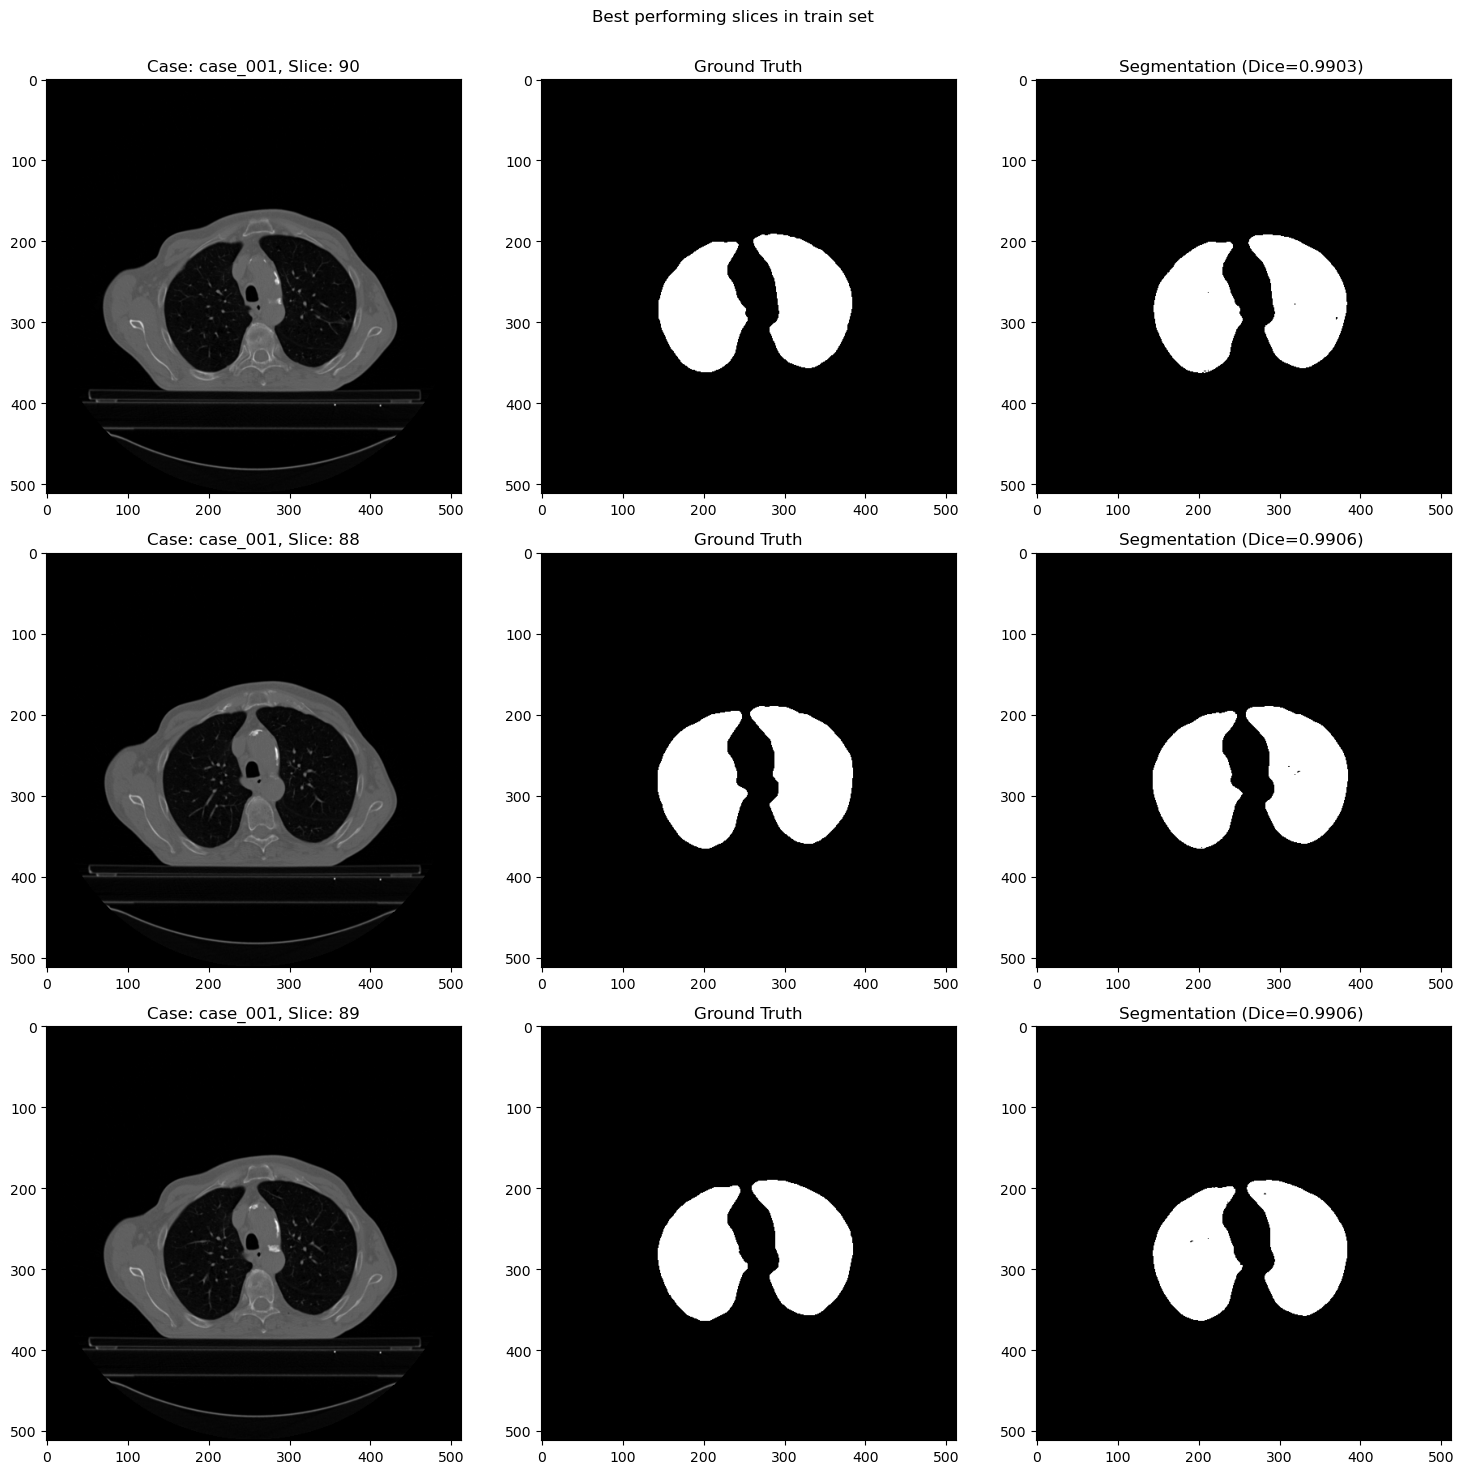

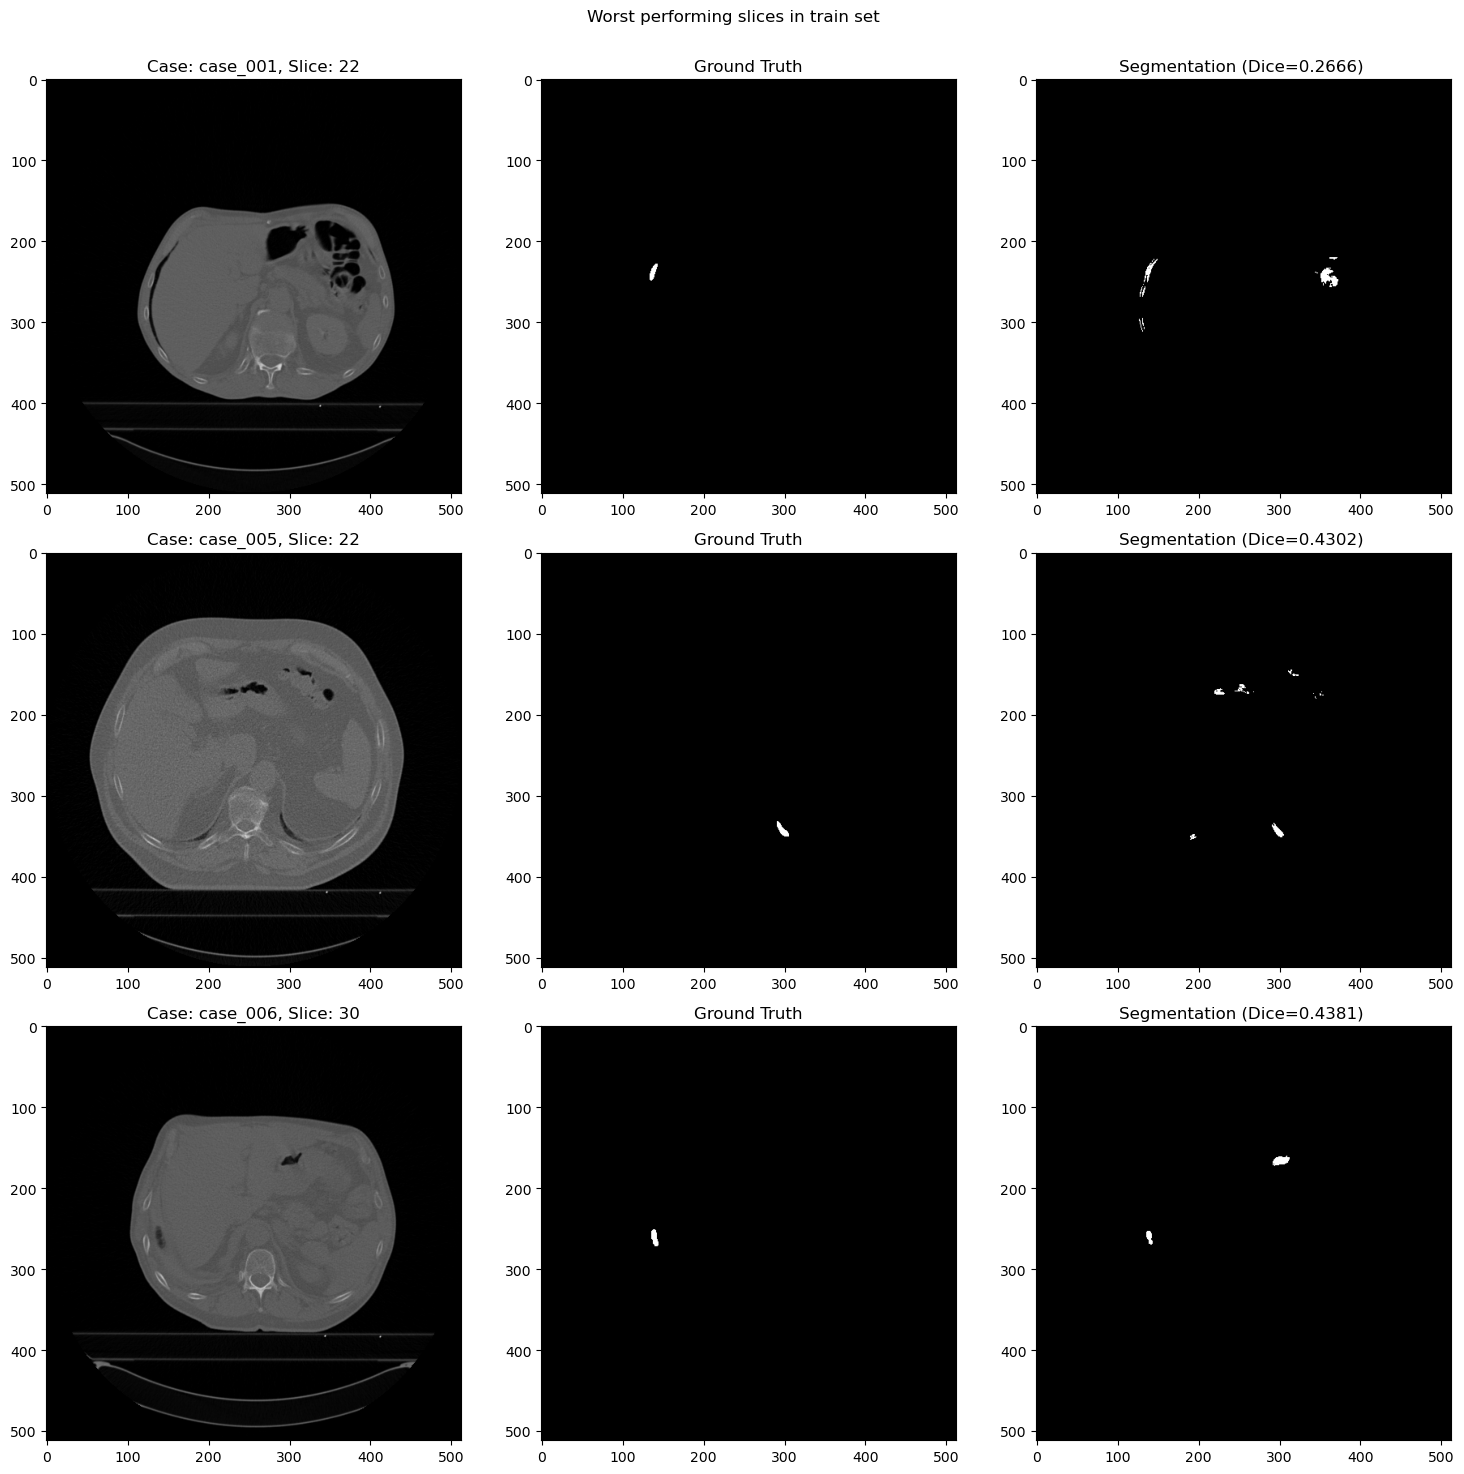

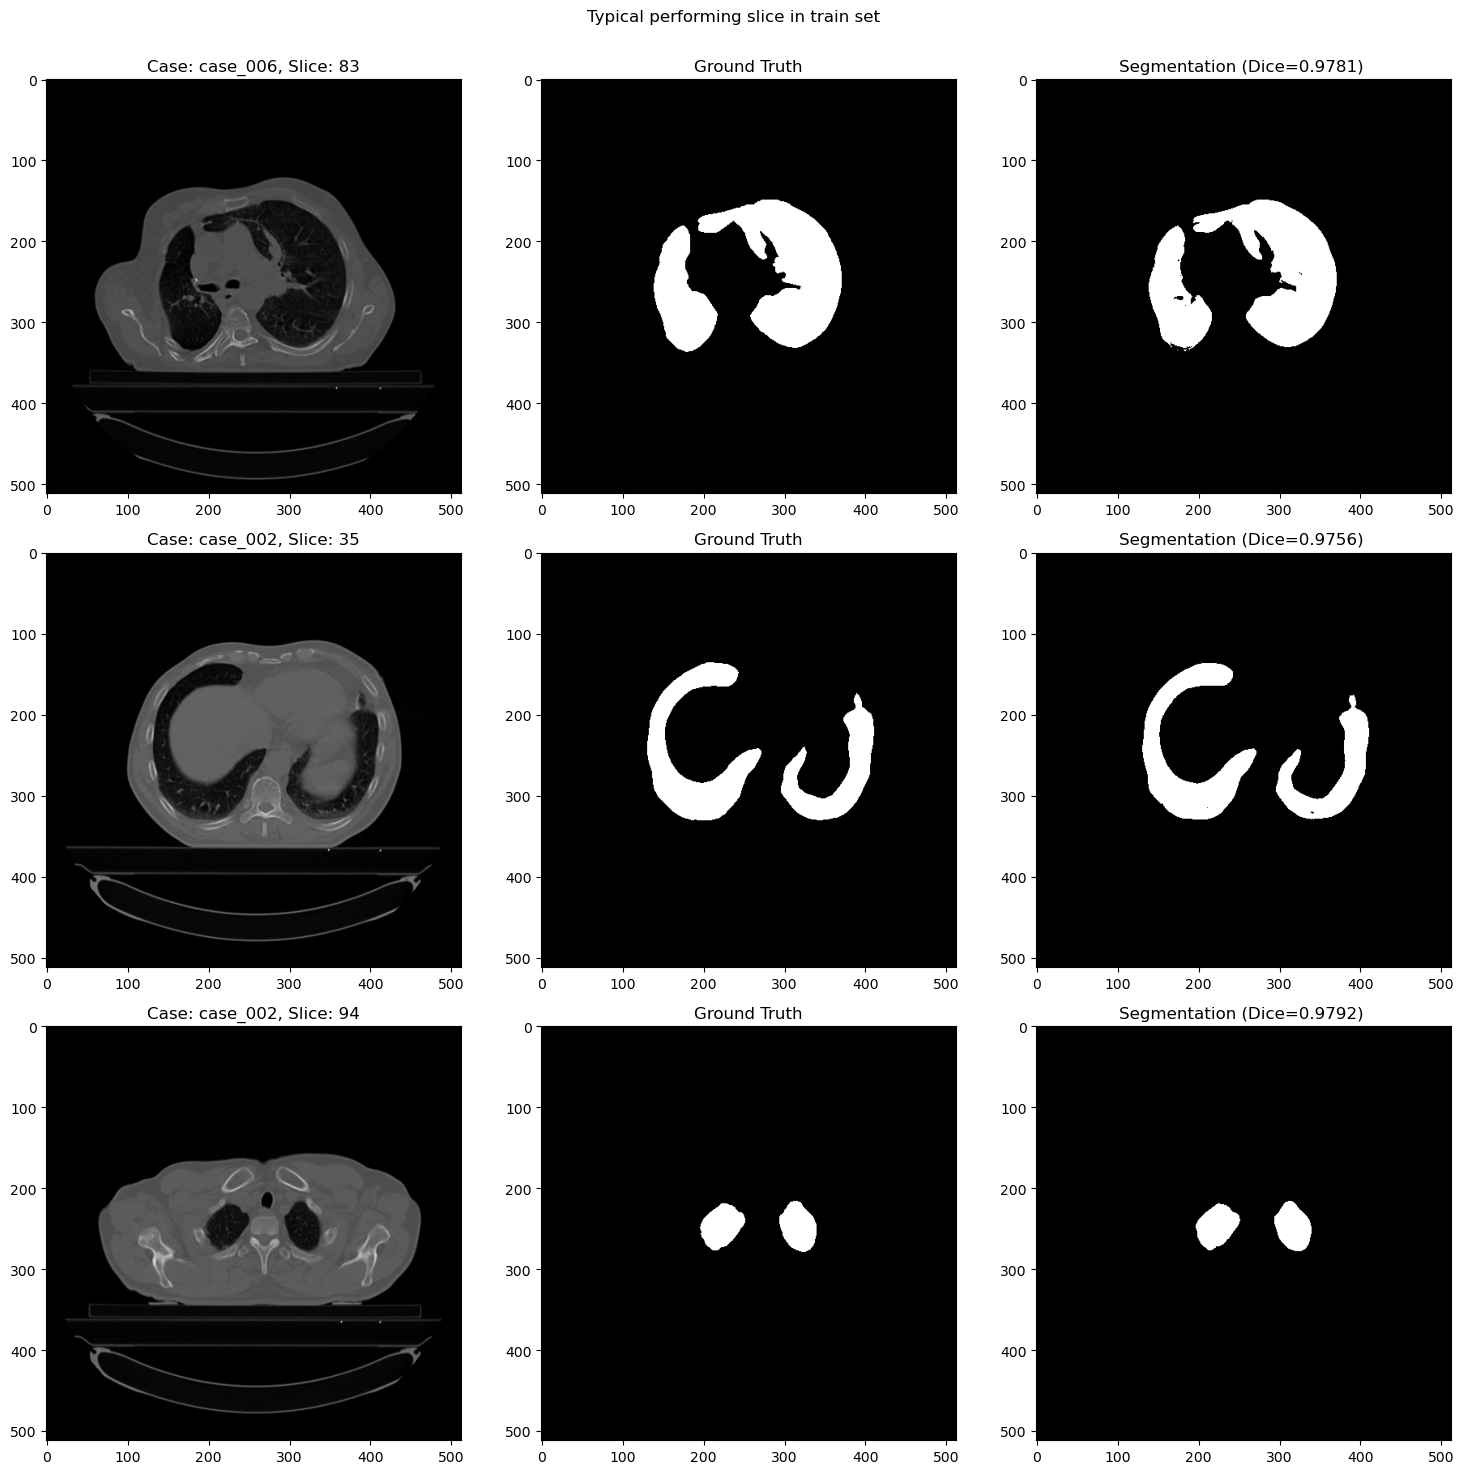

In [14]:
"""Visualise the best, worst and average performing slices in the train set"""
visualise_cases(
    best_train_dice_scores,
    train_set_test_results,
    img_dir,
    mask_dir,
    "Best performing slices in train set",
)
visualise_cases(
    worst_train_dice_scores,
    train_set_test_results,
    img_dir,
    mask_dir,
    "Worst performing slices in train set",
)
visualise_cases(
    in_between_train_dice_scores,
    train_set_test_results,
    img_dir,
    mask_dir,
    "Typical performing slice in train set",
)

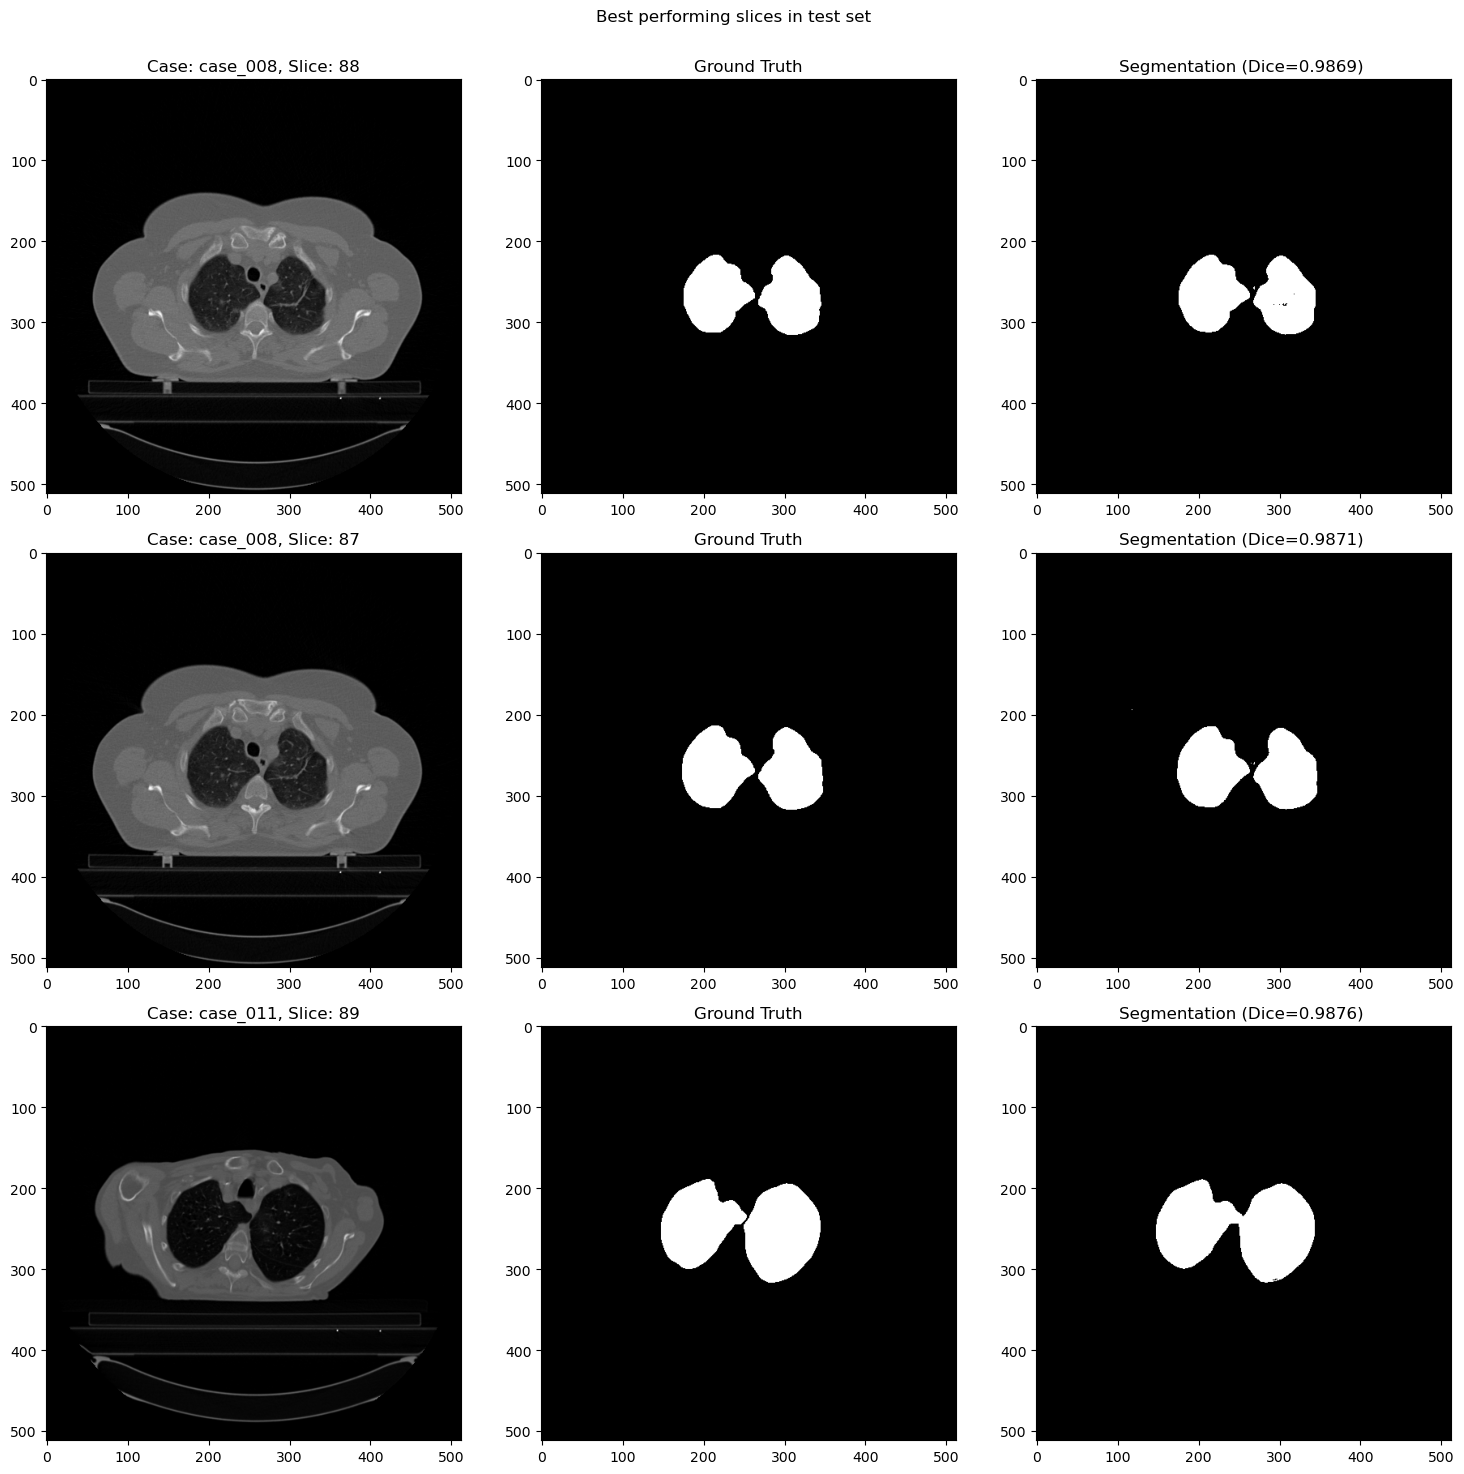

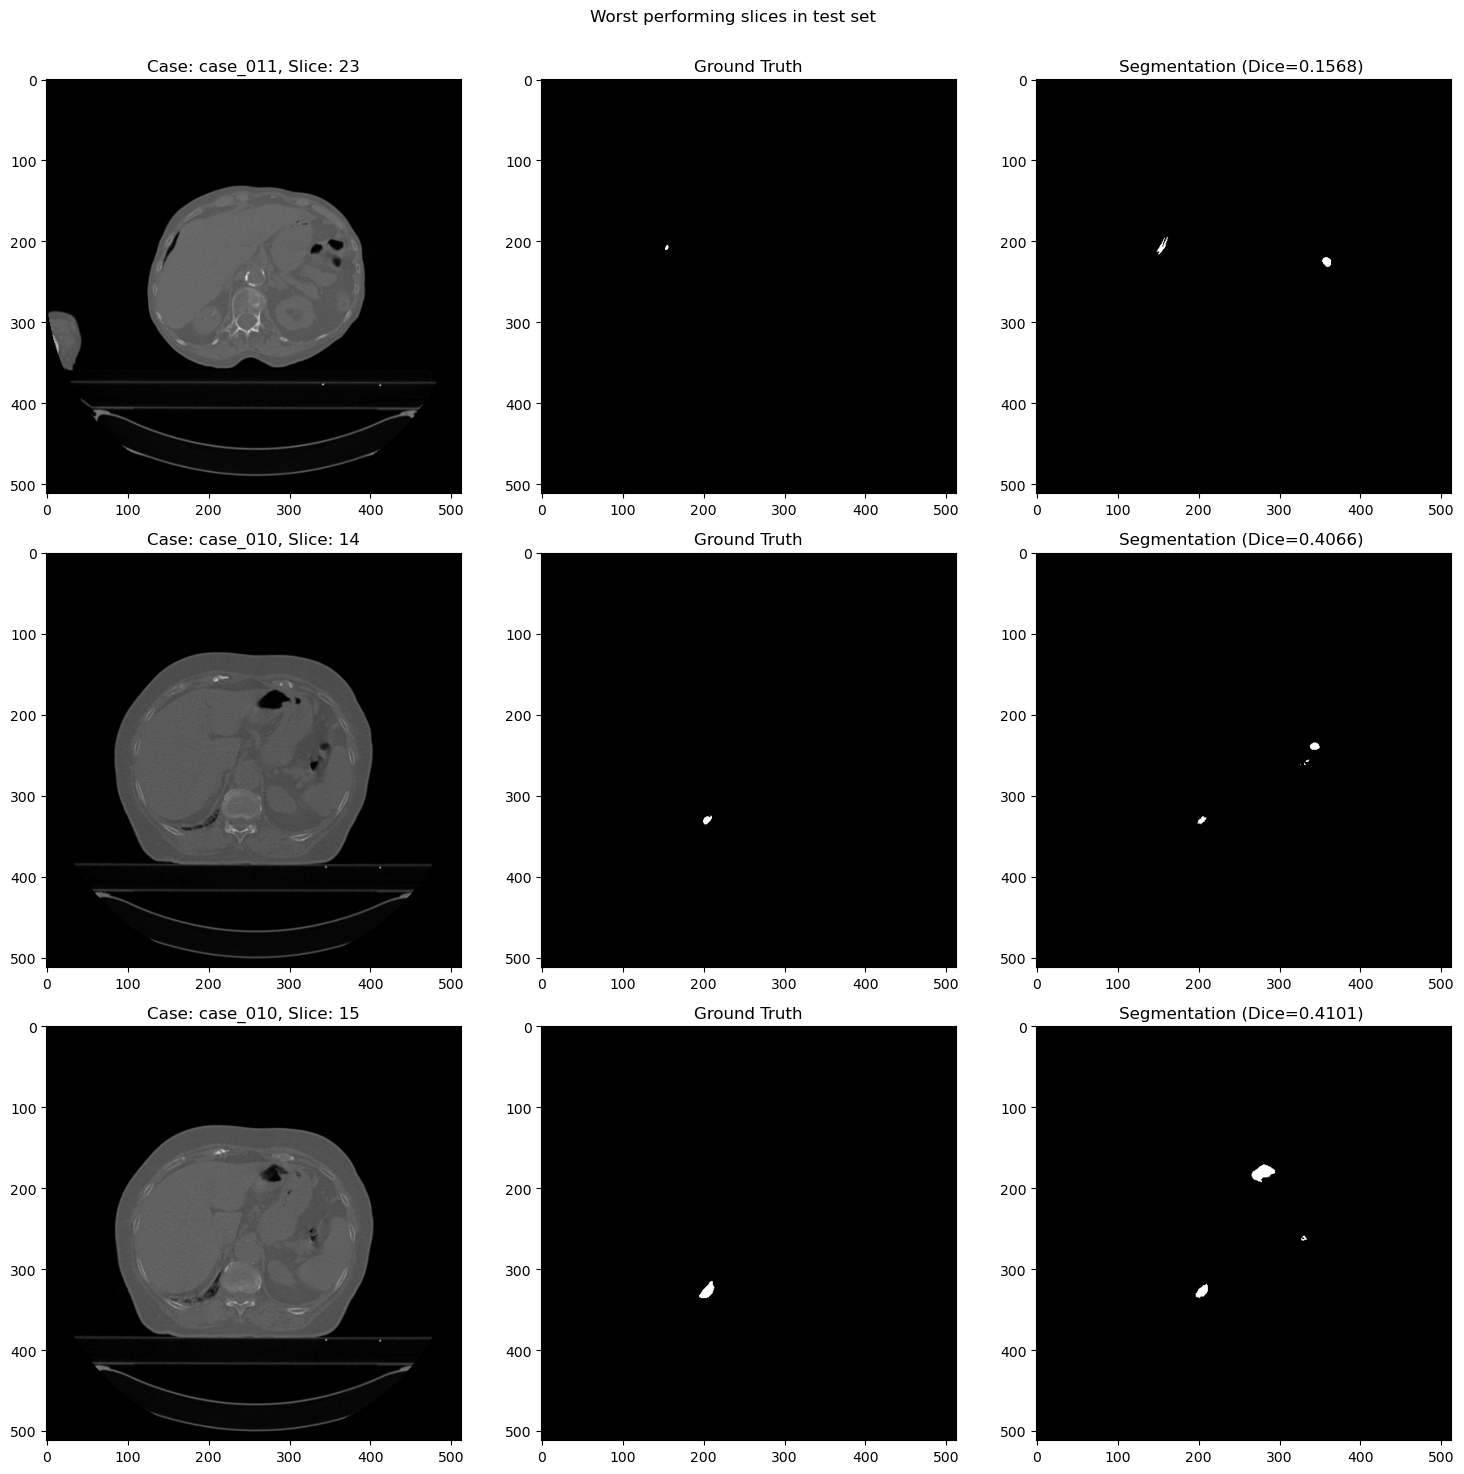

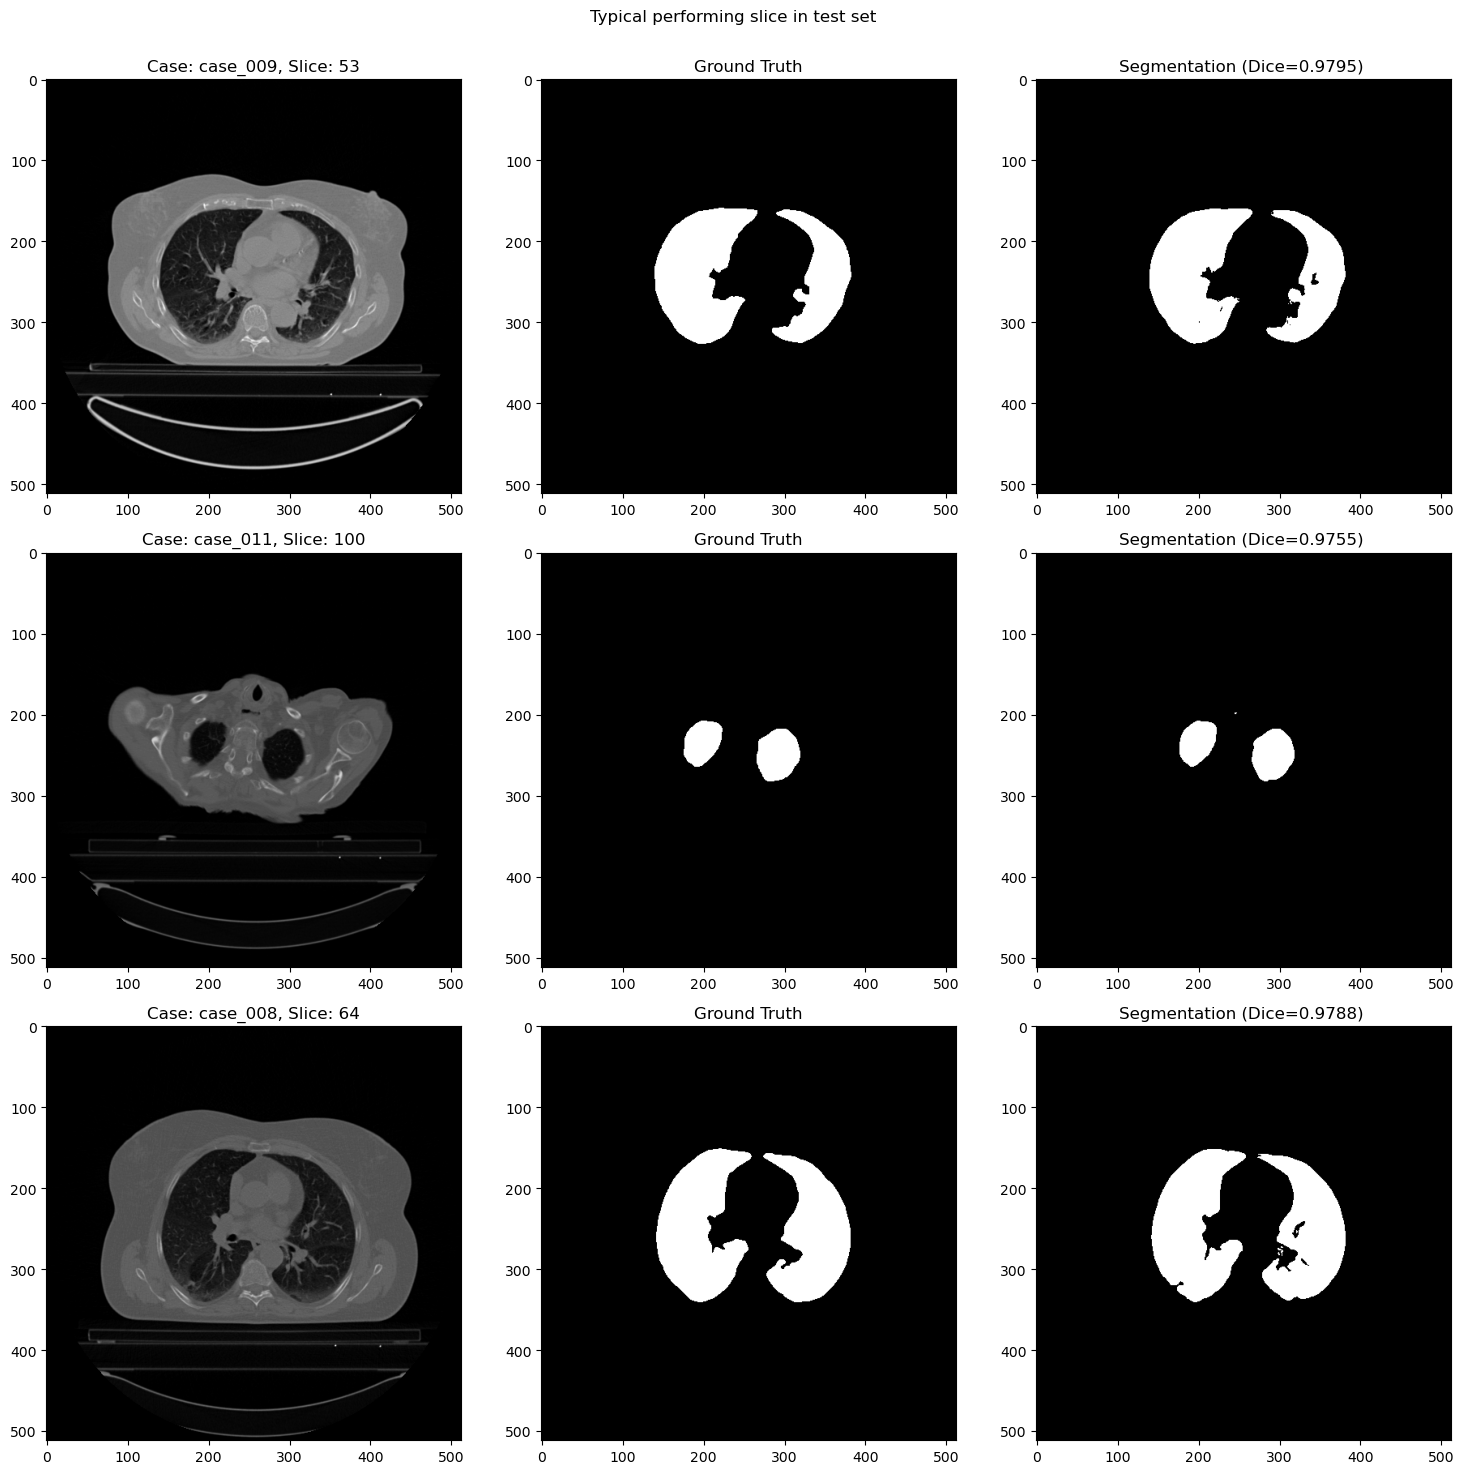

In [15]:
"""Visualise the best, worst and average performing slices in the test set"""
visualise_cases(
    best_test_dice_scores,
    test_set_test_results,
    img_dir,
    mask_dir,
    "Best performing slices in test set",
)
visualise_cases(
    worst_test_dice_scores,
    test_set_test_results,
    img_dir,
    mask_dir,
    "Worst performing slices in test set",
)
visualise_cases(
    in_between_test_dice_scores,
    test_set_test_results,
    img_dir,
    mask_dir,
    "Typical performing slice in test set",
)